# Projeto PUCRS Seção 2

In [10]:
#importando bibliotecas
import pandas as pd
from datetime import datetime
import numpy as np
import seaborn.objects as so
from temperature_proj import temperature_proj

Observação: importei o pandas apenas para visualização, embora pudesse usar o pandas para a plotagem de gráficos, as outras utilizei no módulo onde criei a classe que contem os métodos. Criei esse arquivo com essa classe apenas para praticar os conhecimentos de orientação a objetos em python que já havia estudado anterior ao início do curso. Optei também por utilizar o seaborn.objects ao em vez do matplotlib pois achei a interface dele mais bonita.

In [11]:
# Instânciando Classe
tp = temperature_proj()

In [12]:
# Criando classe para imprimir na tela os dados de um dicionário que será usada posteriormente
def print_dicio(dicio:dict):
        for key in dicio:
            print(f"{key}: {dicio[key]}")

In [13]:
# Definindo o nome do arquivo
arquivo = "anexo_projeto.csv"
# Transformando seus dados em um dicionário com o método da classe temperature_proj, cria_conjunto() que recebe como parâmetro o nome do arquivo
dicionario = tp.cria_conjunto(arquivo)
# Convertendo seus dados para o formato apropriado com o método da classe temperature_proj, dict_temp_data_conversor() que recebe como parâmetro um dicionário python
dicionario = tp.dict_temp_data_conversor(dicionario)     

In [14]:
# Convertendo o dicionário em um DataFrame
tempo = pd.DataFrame(dicionario)
# Observando DataFrame 
display(tempo)

,data,precip,maxima,minima,horas_insol,temp_media,um_relativa,vel_vento
0,1961-01-01,0.0,33.8,22.2,11.7,27.08,67.00,2.333333
1,1961-01-02,0.0,34.7,22.5,9.5,28.06,62.50,1.333333
2,1961-01-03,0.2,27.7,23.1,2.3,24.32,74.25,2.000000
3,1961-01-04,2.4,29.4,20.6,8.7,23.56,57.50,2.333333
4,1961-01-05,0.0,32.5,18.8,10.1,25.22,63.50,3.666667
...,...,...,...,...,...,...,...,...
18558,2016-07-06,21.8,23.3,13.6,1.7,14.96,73.25,4.801440
18559,2016-07-07,0.0,18.4,9.8,7.6,12.96,73.25,2.915160
18560,2016-07-08,0.0,19.4,7.6,6.3,12.64,76.25,1.200360
18561,2016-07-09,0.0,14.2,11.7,0.0,12.66,94.25,1.371840


In [15]:
# Observando as informações gerais do DataFrame
tempo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18563 entries, 0 to 18562
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   data         18563 non-null  datetime64[ns]
 1   precip       18563 non-null  float64       
 2   maxima       18563 non-null  float64       
 3   minima       18563 non-null  float64       
 4   horas_insol  18563 non-null  float64       
 5   temp_media   18563 non-null  float64       
 6   um_relativa  18563 non-null  float64       
 7   vel_vento    18563 non-null  float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 1.1 MB


# Visualização de intervalo de dados em modo texto

In [17]:
print("""Digite o mês e ano iniciais e finais para a obtenção de dados e digite uma opção para os dados que deseja ver:
        1) todos os dados
        2) apenas os de precipitação
        3) apenas os de temperatura
        4) apenas os de umidade e vento """)

# Inserindo mês inicial do intervalo sua devida validação para que o usuário digite sempre um valor válido
mes_i = int(input("Mês inicial: "))
while mes_i not in list(range(1, 13)):
    print("Digite um mês válido!")
    mes_i = int(input("Mês inicial: "))

# Inserindo ano inicial do intervalo fazendo sua devida validação para que o usuário digite sempre um valor válido
ano_i = int(input("Ano inicial: "))
while ano_i < 1961 or ano_i > 2016:
    print("Digite um ano válido!")
    ano_i = int(input("Ano inicial: "))

# Inserindo mês final do intervalo sua devida validação para que o usuário digite sempre um valor válido
mes_f = int(input("Mês final: "))
while mes_f not in list(range(1, 13)):
    print("Digite um mês válido!")
    mes_f = int(input("Mês final: "))

# Inserindo ano final do intervalo sua devida validação para que o usuário digite sempre um valor válido
ano_f = int(input("Ano final: "))
while ano_f < 1961 or ano_f > 2016:
    print("Digite um ano válido!")
    ano_f = int(input("Ano inicial: "))

# Criando validação para o caso de o ano final do intervalo for maior que o inicial e pedindo para o usuário digitar novamente
while ano_i > ano_f:
    print("Ano inicial não pode ser maior que o final!\nDigite mês inicial e final novamente:")
    ano_i = int(input("Ano inicial: "))
    ano_f = int(input("Ano inicial: "))


# Criando validação para o caso de, se o intervalo de tempo for no mesmo ano, caso o mês inicial seja maior que o final, o usuário digite-os novamente
if ano_i == ano_f:
    while mes_i > mes_f:
        print("Mês inicial não pode ser maior que o final quando o intervalo de tempo é do mesmo ano!")
        print("Por favor digite os meses novamente:")
        mes_i = int(input("Mês inicial: "))
        mes_f = int(input("Mês final: "))

# Inseridno opção para a observação dos dados desejados com validação para caso o usuário digite um valor inválido
opcao = int(input("Digite um número de 1 a 4: "))
while opcao not in list(range(1, 5)):
    print("Digíte um número válido!")
    opcao = int(input("Digite um número de 1 a 4: "))

# Colocando os dados no formato "mês/ano" para inseri-los na função 
inicio = f"{mes_i}/{ano_i}"
fim = f"{mes_f}/{ano_f}"

# Imprimindo dados na tela
print()
print()
print("Os dados solicitados são: ")
print("-"*100)
tp.visualiza_dados_totais(inicio, fim, arquivo, opcao)

Digite o mês e ano iniciais e finais para a obtenção de dados e digite uma opção para os dados que deseja ver:
        1) todos os dados
        2) apenas os de precipitação
        3) apenas os de temperatura
        4) apenas os de umidade e vento 
Mês inicial: 1
Ano inicial: 2000
Mês final: 5
Ano final: 2016
Digite um número de 1 a 4: 1


Os dados solicitados são: 
----------------------------------------------------------------------------------------------------

                                    data: 01/01/2000
                                    precip: 2.6              
                                    maxima: 26.1              
                                    minima: 18.2             
                                    horas_insol: 7.6 
                                    temp_media: 21.98         
                                    um_relativa: 73.25         
                                    vel_vento: 4.133333

                                    

           

# Mês mais chuvoso

In [8]:
# Utilizando o método mes_mais_chuvoso da classe temperature_proj para obter o mês mais chuvoso dos dados do arquivo
tp.mes_mais_chuvoso(arquivo)

O mês com maior precipicação foi Maio do ano 2008 com a precipitação de 149.6


# Média da temperatura mínima de um determinado mês (auge do inverno) nos últimos 11 anos (2006 a 2016)

# Gráfico de barras (vertical ou horizontal) com as médias de temperatura mínima de um determinado mês nos últimos 11 anos

#  Média geral da temperatura mínima de um determinado mês nos últimos 11 anos (2006 a 2016)

Digite um mês para observar a média mínima desse mês em cada ano:
Mês desejado: maio
Médias do mês de Maio no formato dicionário: 
----------------------------------------------------------------------------------------------------
maio2006: 12.145161290322584
maio2007: 11.951612903225802
maio2008: 12.822580645161288
maio2009: 13.712903225806452
maio2010: 14.316129032258061
maio2011: 13.216129032258065
maio2012: 14.425806451612903
maio2013: 12.748387096774193
maio2014: 13.674193548387091
maio2015: 14.751612903225805
maio2016: 12.251612903225809

Plotando gráfico referente às médias de Maio de cada ano:
----------------------------------------------------------------------------------------------------


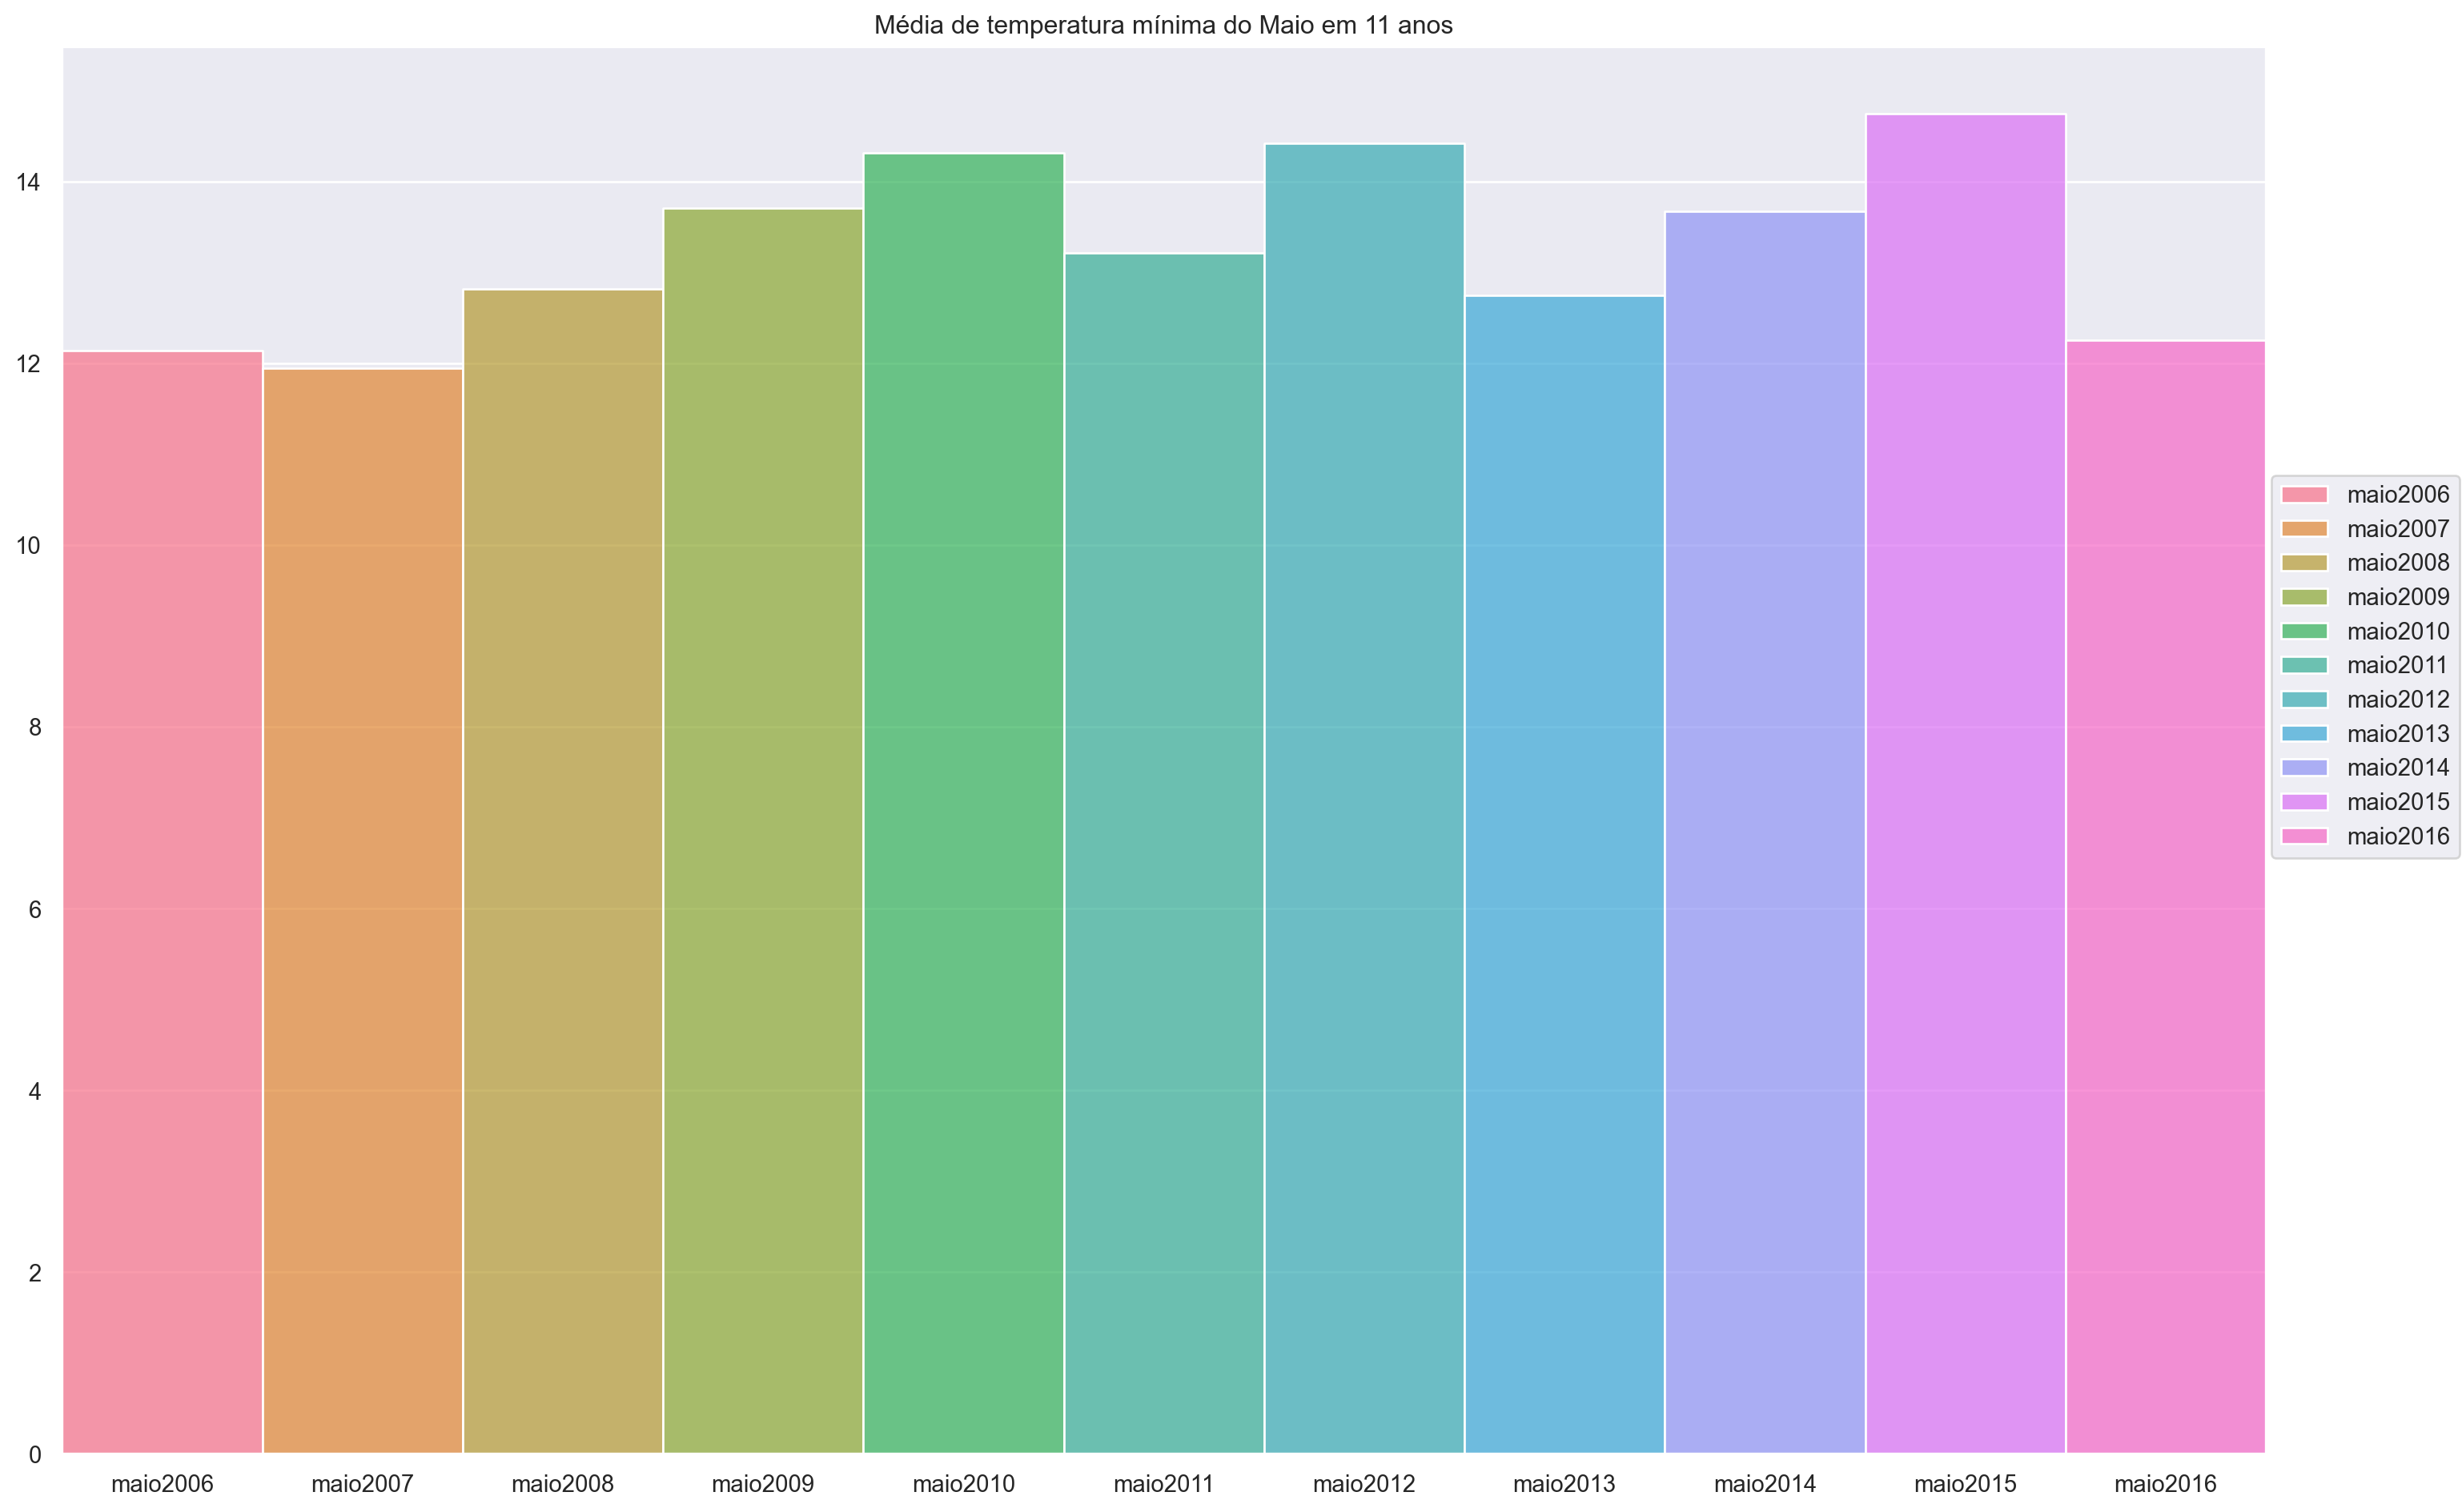


----------------------------------------------------------------------------------------------------
Média Mínima Geral do mês de Maio: 13.274193548387096


In [9]:
# Criando lista para os mêses para validação
meses_validos = ['janeiro', 'fevereiro', 'março', 'abril', 'maio', 'junho', 'julho', 'agosto', 'setembro', 'outubro', 'novembro', 'dezembro']

# Inserindo mês desejado
print("Digite um mês para observar a média mínima desse mês em cada ano:")
mes_desejado = input("Mês desejado: ")

# Fazendo validação do mês
while mes_desejado.lower() not in meses_validos:
    print("Digite um mês válido!")
    mes_desejado = input("Mês desejado: ")

# Criando o dicionário com a temperatura média de cada mês por ano com o método temp_min_media_mes_ultimos11 da classe temperature_proj
temp_media = tp.temp_min_media_mes_ultimos11(arquivo, mes_desejado.lower())
print(f"Médias do mês de {mes_desejado.capitalize()} no formato dicionário: ")
print("-"*100)

# Mostrando os dados do dicionário na tela do formato que foi pedido no projeto
print_dicio(temp_media)
print()

# Plotando gráfico pelo seaborn.objects através do método analise_gradica_11anos da classe temperature_proj
print(f"Plotando gráfico referente às médias de {mes_desejado.capitalize()} de cada ano:")
print("-"*100)
display(tp.analise_gradica_11anos(arquivo, mes_desejado.lower()))
print()
print("-"*100)

# Plotando valor da média mínima geral conforme foi pedido no projeto 
print(f"Média Mínima Geral do mês de {mes_desejado.capitalize()}: {tp.media_geral_mes_11(arquivo, mes_desejado.lower())}")